In [116]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from datascience import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [117]:
from google.colab import files
uploaded = files.upload()

Saving Admissions.csv to Admissions (3).csv


In [118]:
data = pd.read_csv("Admissions.csv")
data.head()
# DATA = Table.read_table("Admissions.csv")
# DATA.show(3)
# DATA.scatter('rank','gpa', colors = 2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [119]:
features = data[['gre','gpa','rank']]
features[0:5]


,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [120]:
TARGET = data[['admit']]
TARGET[0:5]

,admit
0,0
1,1
2,1
3,1
4,0


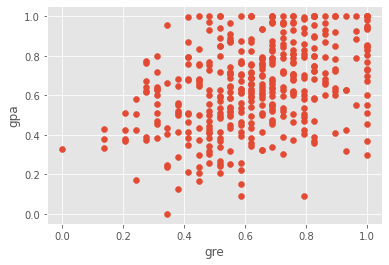

In [121]:
# SCALE PREDICTOR between 0 and 1
featuresSCALED = preprocessing.minmax_scale(data[['gre','gpa','rank']])
featuresSCALED[0:5]
plt.scatter(featuresSCALED[:,0], featuresSCALED[:,1])
plt.xlabel("gre")
plt.ylabel("gpa")
plt.show()

In [122]:
print(TARGET[:5])

   admit
0      0
1      1
2      1
3      1
4      0


In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# ENCODE the RESPONSE VARIABLE
TARGETS = np.array(data["admit"])
print(TARGETS[0:5])
print(type(TARGETS))

TARGETS_onehot  = pd.get_dummies(TARGETS)
TARGETShot = np.array(TARGETS_onehot)
print(TARGETShot[0:5,:])

[0 1 1 1 0]
<class 'numpy.ndarray'>
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [124]:
# PRINTING again the PREDICTORS and the RESPONSE variables 
print(type(featuresSCALED))
print(featuresSCALED.shape)
print(featuresSCALED[:5,:])

print(type(TARGETShot))
print(TARGETShot.shape)
print(TARGETShot[:5])

<class 'numpy.ndarray'>
(400, 3)
[[0.27586207 0.77586207 0.66666667]
 [0.75862069 0.81034483 0.66666667]
 [1.         1.         0.        ]
 [0.72413793 0.53448276 1.        ]
 [0.51724138 0.38505747 1.        ]]
<class 'numpy.ndarray'>
(400, 2)
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [125]:
# here to make the NEURAL NETWORK MODEL
features = featuresSCALED
output = TARGETShot

features_shape = features.shape[1]
print(features_shape)

output_shape = output.shape[1]
print(output_shape)

3
2


In [126]:
# in ORDER to vary the  NUMBER of LAYERS from 1 to 10: 
# we work with hidden_notes from 1 to 10
epochs = 1000

[[103  29]
 [  0   0]]
The number of NEURONS in the hidden layers 1
Accuracy Score: 0.7803030303030303
[[92 24]
 [11  5]]
The number of NEURONS in the hidden layers 2
Accuracy Score: 0.7348484848484849
[[102  28]
 [  1   1]]
The number of NEURONS in the hidden layers 3
Accuracy Score: 0.7803030303030303
[[93 24]
 [10  5]]
The number of NEURONS in the hidden layers 4
Accuracy Score: 0.7424242424242424
[[90 22]
 [13  7]]
The number of NEURONS in the hidden layers 5
Accuracy Score: 0.7348484848484849
[[92 22]
 [11  7]]
The number of NEURONS in the hidden layers 6
Accuracy Score: 0.75
[[94 24]
 [ 9  5]]
The number of NEURONS in the hidden layers 7
Accuracy Score: 0.75
[[91 22]
 [12  7]]
The number of NEURONS in the hidden layers 8
Accuracy Score: 0.7424242424242424
[[90 22]
 [13  7]]
The number of NEURONS in the hidden layers 9
Accuracy Score: 0.7348484848484849


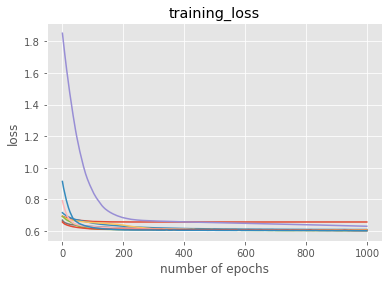

In [127]:
for I in range(1,10):
    # print(I)
    hidden_nodes = I
    #print(hidden_nodes)
    RANDOM_SEED = 1234
    TRAIN_features, TEST_features, TRAIN_output, TEST_output = train_test_split(featuresSCALED, output, test_size=0.33, random_state = RANDOM_SEED)
    # here making the NEURAL NETWORK in KERAS
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim = features_shape, activation = "relu"))
    model.add(Dense(output_shape, activation = "softmax"))

    model.compile(loss="categorical_crossentropy", optimizer = "adam")
    # model.summary()
    hist = model.fit(TRAIN_features, TRAIN_output, epochs = epochs, batch_size = 128, verbose=0)
    training_loss = hist.history["loss"]
    xc = range(epochs)
    plt.plot(xc, training_loss)
    plt.xlabel("number of epochs")
    plt.ylabel("loss")
    plt.title("training_loss")
    plt.grid(True)
    plt.style.use(["ggplot"])
    for layerNum, layer in enumerate(model.layers):
        # print("Weights Values = ")
        weights = layer.get_weights()[0]
        # print(weights)
        # print("Bias Values = ")
        biases = layer.get_weights()[1]
        # print(biases)                     
        # print("                                ")
# here predicting the outcome of the TEST_FEATURES

    PREDICTIONS = model.predict(TEST_features)
    predictClass = np.argmax(PREDICTIONS, axis=1)
    # print(predictClass)

# the values of the TEST_OUTPUT

    the_OUTPUT_of_the_MODEL = np.argmax(TEST_output, axis =1)
    # print(the_OUTPUT_of_the_MODEL)
   
   # BUILDING the CONFUSION MATRIX
    CM = confusion_matrix(predictClass, the_OUTPUT_of_the_MODEL)
    print(CM)
    print("The number of NEURONS in the hidden layers", I)  
    print("Accuracy Score:", accuracy_score(predictClass, the_OUTPUT_of_the_MODEL))      

In [70]:
    # STARTING with the NUMBER of HIDDEN LAYERS
    # the NUMBER of HIDDEN LAYES
    # hidden_nodes = 5